In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv(r'aerofit_treadmill.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape

(180, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df['Product'].value_counts().reset_index()

,index,Product
0,KP281,80
1,KP481,60
2,KP781,40


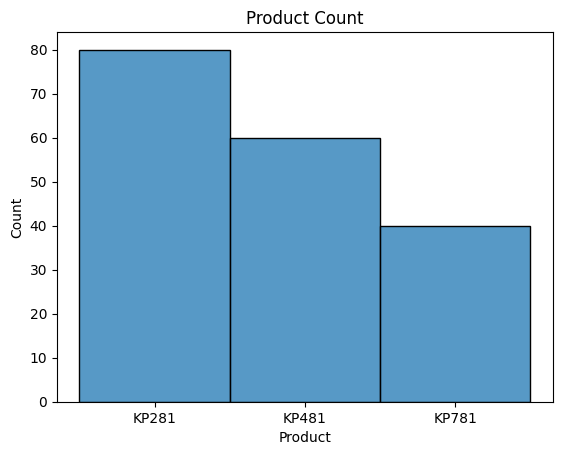

In [8]:
sns.histplot(data=df,x='Product')
plt.title('Product Count')
plt.show()

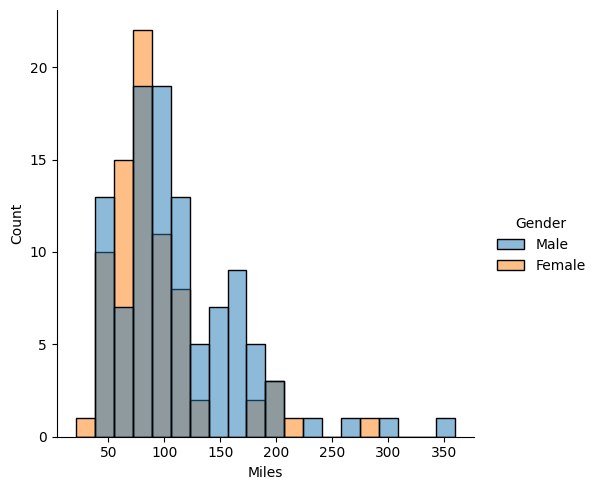

In [9]:
sns.displot(df, x="Miles",hue='Gender', bins=20)

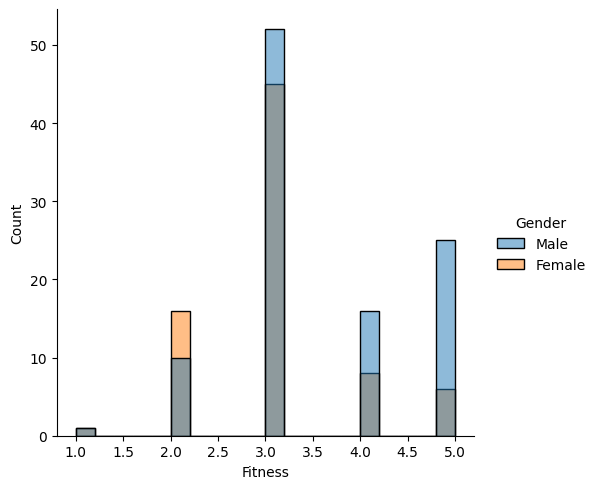

In [10]:
sns.displot(df, x="Fitness",hue='Gender', bins=20)

In [11]:
df['Gender'].value_counts().reset_index()

,index,Gender
0,Male,104
1,Female,76


In [12]:
df['MaritalStatus'].value_counts().reset_index()

,index,MaritalStatus
0,Partnered,107
1,Single,73


In [13]:
df[['Product','Gender']].value_counts().reset_index().sort_values('Product')

,Product,Gender,0
0,KP281,Female,40
1,KP281,Male,40
3,KP481,Male,31
4,KP481,Female,29
2,KP781,Male,33
5,KP781,Female,7


<Axes: xlabel='Product', ylabel='Count'>

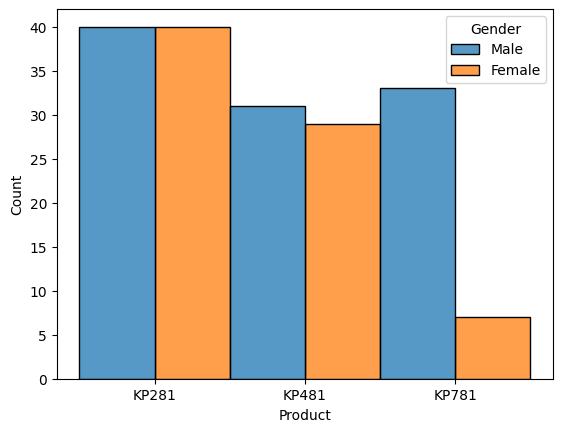

In [14]:
sns.histplot(data=df,x='Product',hue='Gender', multiple="dodge")

In [15]:
df[['Product','MaritalStatus']].value_counts().reset_index()

,Product,MaritalStatus,0
0,KP281,Partnered,48
1,KP481,Partnered,36
2,KP281,Single,32
3,KP481,Single,24
4,KP781,Partnered,23
5,KP781,Single,17


<Axes: xlabel='Product', ylabel='Count'>

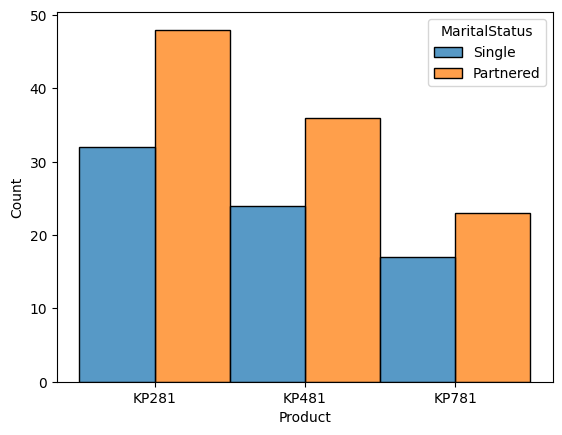

In [16]:
sns.histplot(data=df,x='Product',hue='MaritalStatus', multiple="dodge")

##### Partnered  people purchase more product than single

<Axes: xlabel='variable', ylabel='value'>

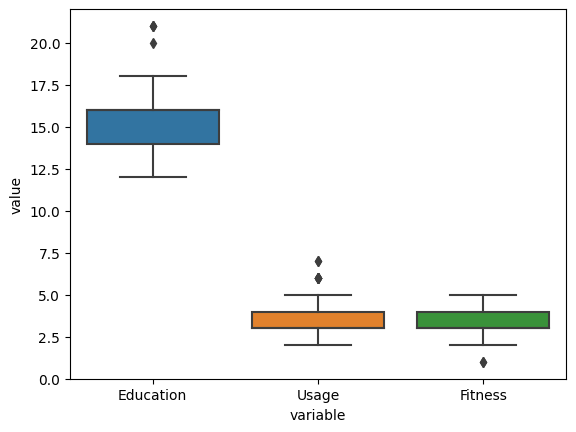

In [17]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['Education','Usage','Fitness']]))

<Axes: xlabel='Age'>

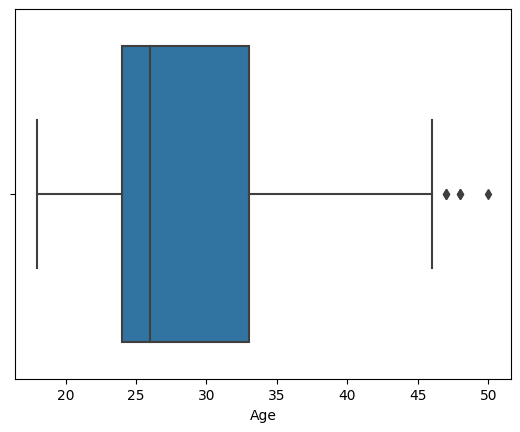

In [18]:
sns.boxplot(data=df,x='Age')

In [19]:
def remove_outlier(data):
    q75,q25 = np.percentile(data['Age'],[75,25])
    intr_qr = q75-q25
 
    q100 = q75+(1.5*intr_qr)
    q0 = q25-(1.5*intr_qr)
     
    return data.loc[(data['Age'] > q0) & (data['Age'] < q100)] 

print('Mean before removing outlier',df['Age'].mean())
print('Median before removing outlier',df['Age'].median())

print('Mean after removing outlier',remove_outlier(df)['Age'].mean())
print('Median after removing outlier',remove_outlier(df)['Age'].median())

Mean before removing outlier 28.788888888888888
Median before removing outlier 26.0
Mean after removing outlier 28.24
Median after removing outlier 26.0


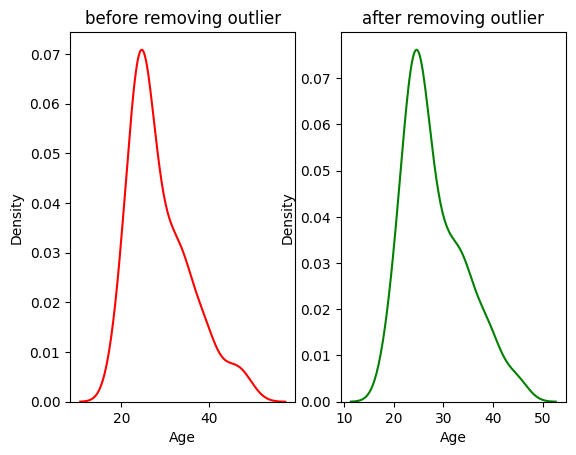

In [20]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(data=df,x='Age', color="red" ,ax=axes[0])
axes[0].title.set_text("before removing outlier")
sns.kdeplot(data=remove_outlier(df),x='Age', color="green", ax=axes[1])
axes[1].title.set_text("after removing outlier")
plt.show()

<Axes: xlabel='Income'>

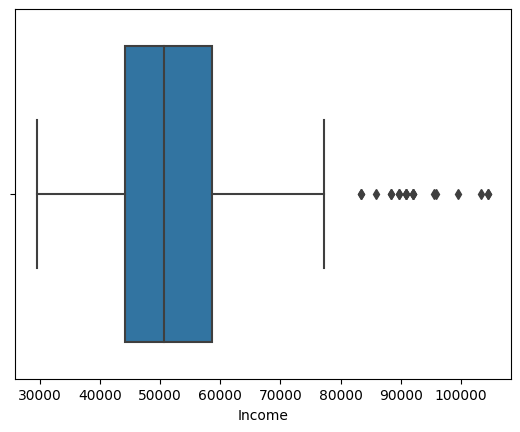

In [21]:
sns.boxplot(data=df,x='Income')

In [22]:
def remove_outlier(data):
    q75,q25 = np.percentile(data['Income'],[75,25])
    intr_qr = q75-q25
 
    q100 = q75+(1.5*intr_qr)
    q0 = q25-(1.5*intr_qr)
    
    return data.loc[(data['Income'] > q0) & (data['Income'] < q100)] 

print('Mean before removing outlier',df['Income'].mean())
print('Median before removing outlier',df['Income'].median())

print('Mean after removing outlier',remove_outlier(df)['Income'].mean())
print('Median after removing outlier',remove_outlier(df)['Income'].median())

Mean before removing outlier 53719.57777777778
Median before removing outlier 50596.5
Mean after removing outlier 49119.1801242236
Median after removing outlier 48891.0


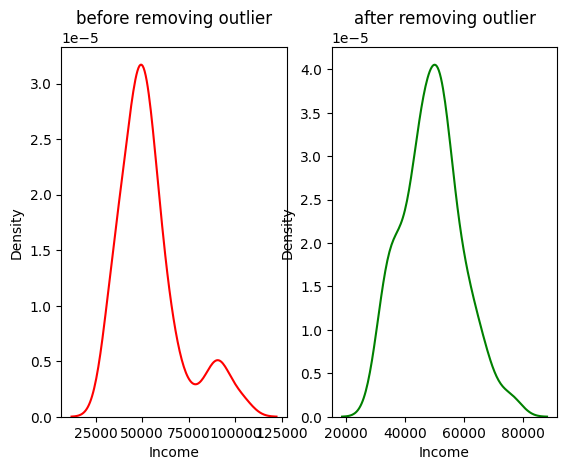

In [23]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(data=df,x='Income', color="red" ,ax=axes[0])
axes[0].title.set_text("before removing outlier")
sns.kdeplot(data=remove_outlier(df),x='Income', color="green", ax=axes[1])
axes[1].title.set_text("after removing outlier")
plt.show()

<Axes: xlabel='Miles'>

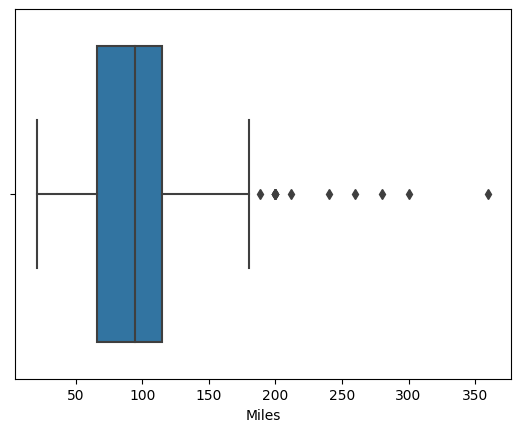

In [24]:
sns.boxplot(data=df,x='Miles')

#### Removing Outlier and check for mean and median

In [25]:
def remove_outlier(data):
    q75,q25 = np.percentile(data['Miles'],[75,25])
    intr_qr = q75-q25
 
    q100 = q75+(1.5*intr_qr)
    q0 = q25-(1.5*intr_qr)
    
    return data.loc[(data['Miles'] > q0) & (data['Miles'] < q100)] 

print('Mean before removing outlier',df['Miles'].mean())
print('Median before removing outlier',df['Miles'].median())

print('Mean after removing outlier',remove_outlier(df)['Miles'].mean())
print('Median after removing outlier',remove_outlier(df)['Miles'].median())

Mean before removing outlier 103.19444444444444
Median before removing outlier 94.0
Mean after removing outlier 93.02395209580838
Median after removing outlier 85.0


###### Here Outlier affect both mean and median

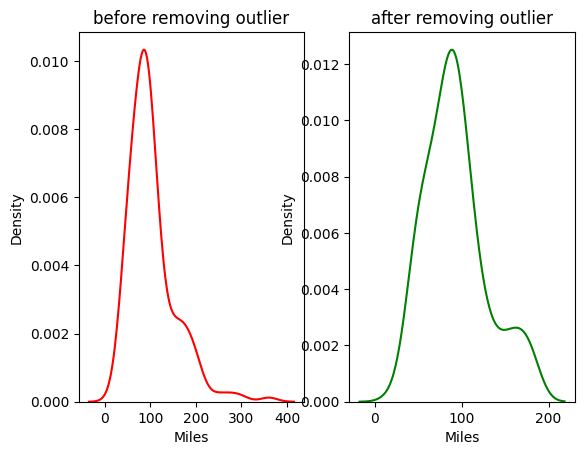

In [26]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(data=df,x='Miles', color="red" ,ax=axes[0])
axes[0].title.set_text("before removing outlier")
sns.kdeplot(data=remove_outlier(df),x='Miles', color="green", ax=axes[1])
axes[1].title.set_text("after removing outlier")
plt.show()

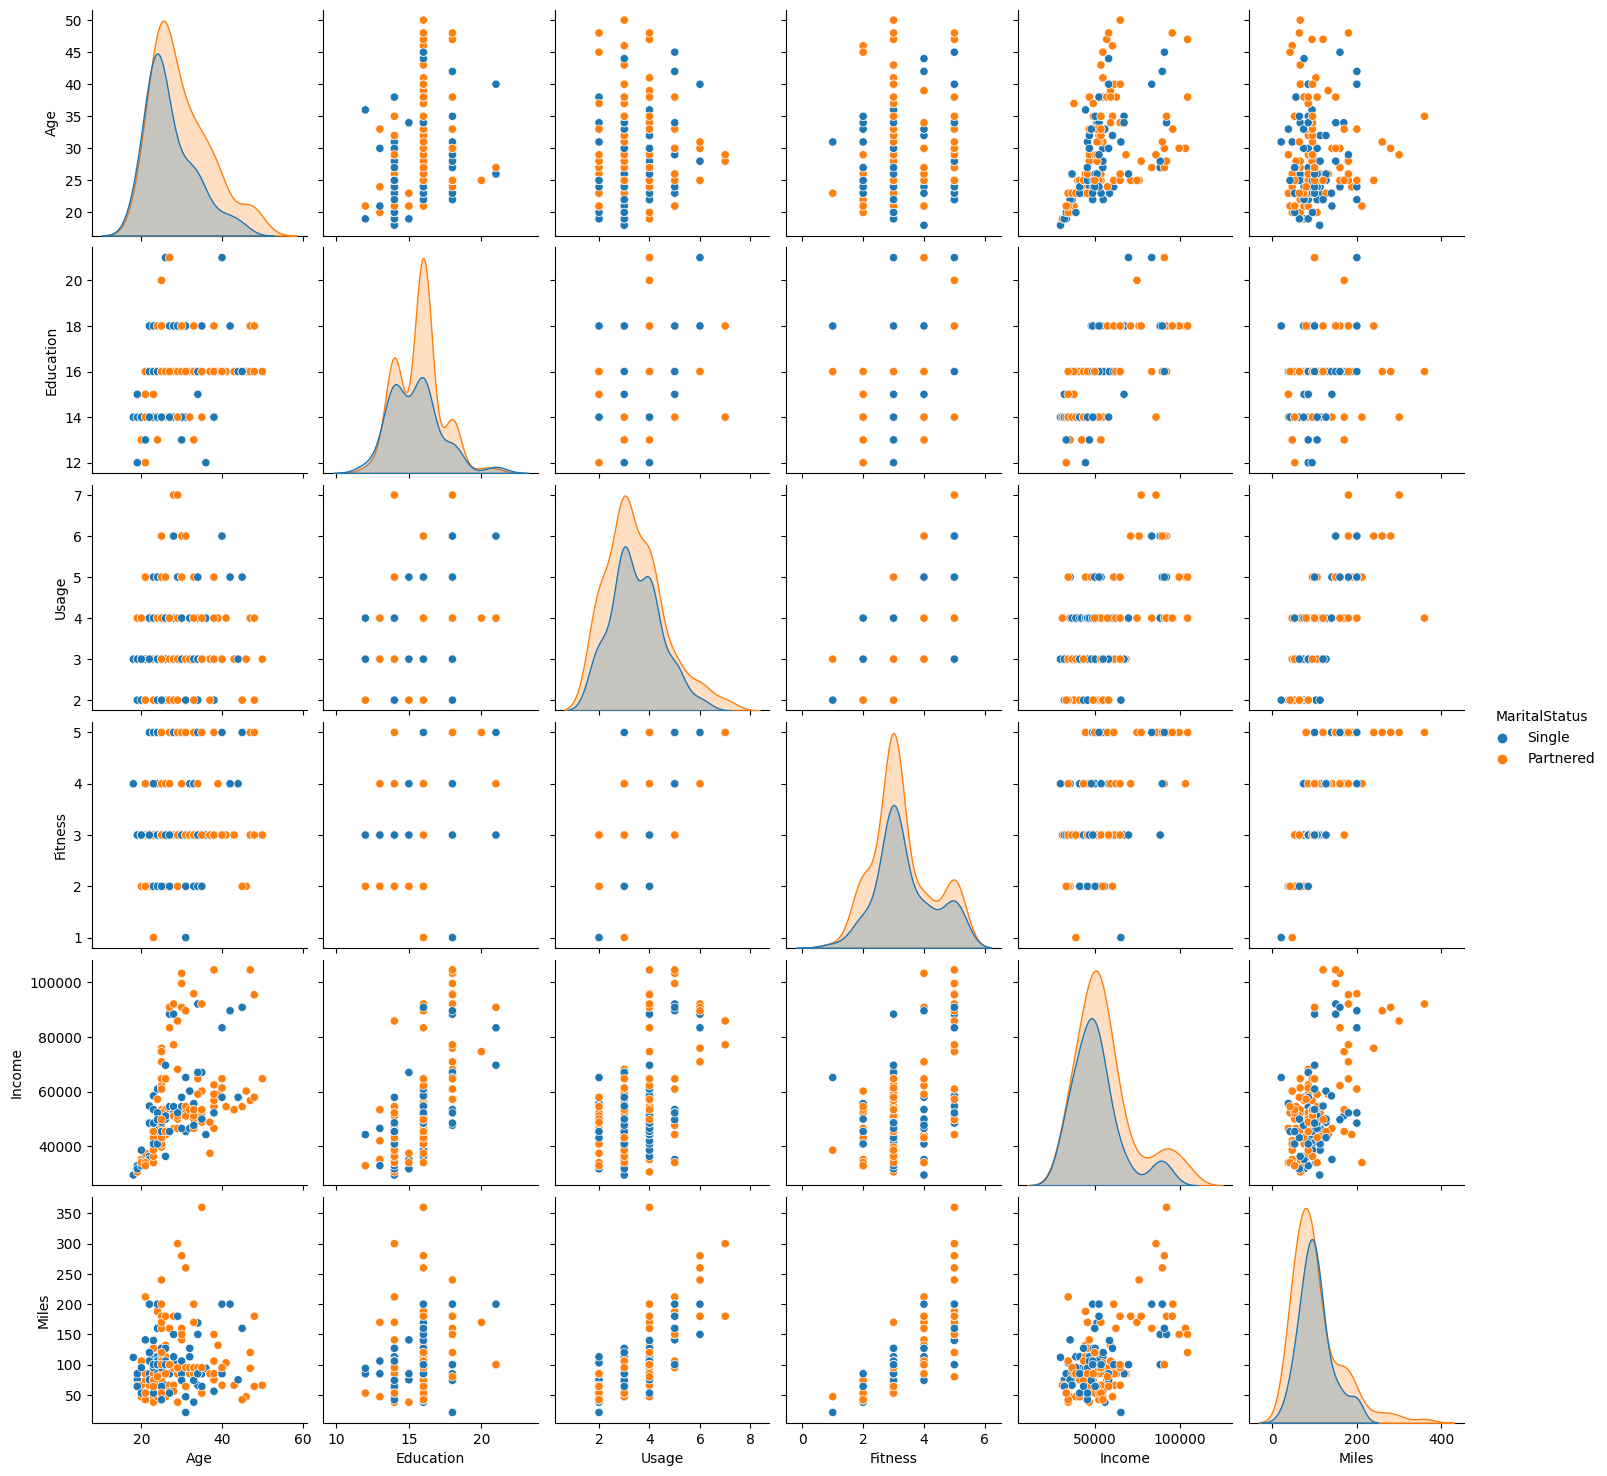

In [27]:
sns.pairplot(data=df,hue='MaritalStatus')

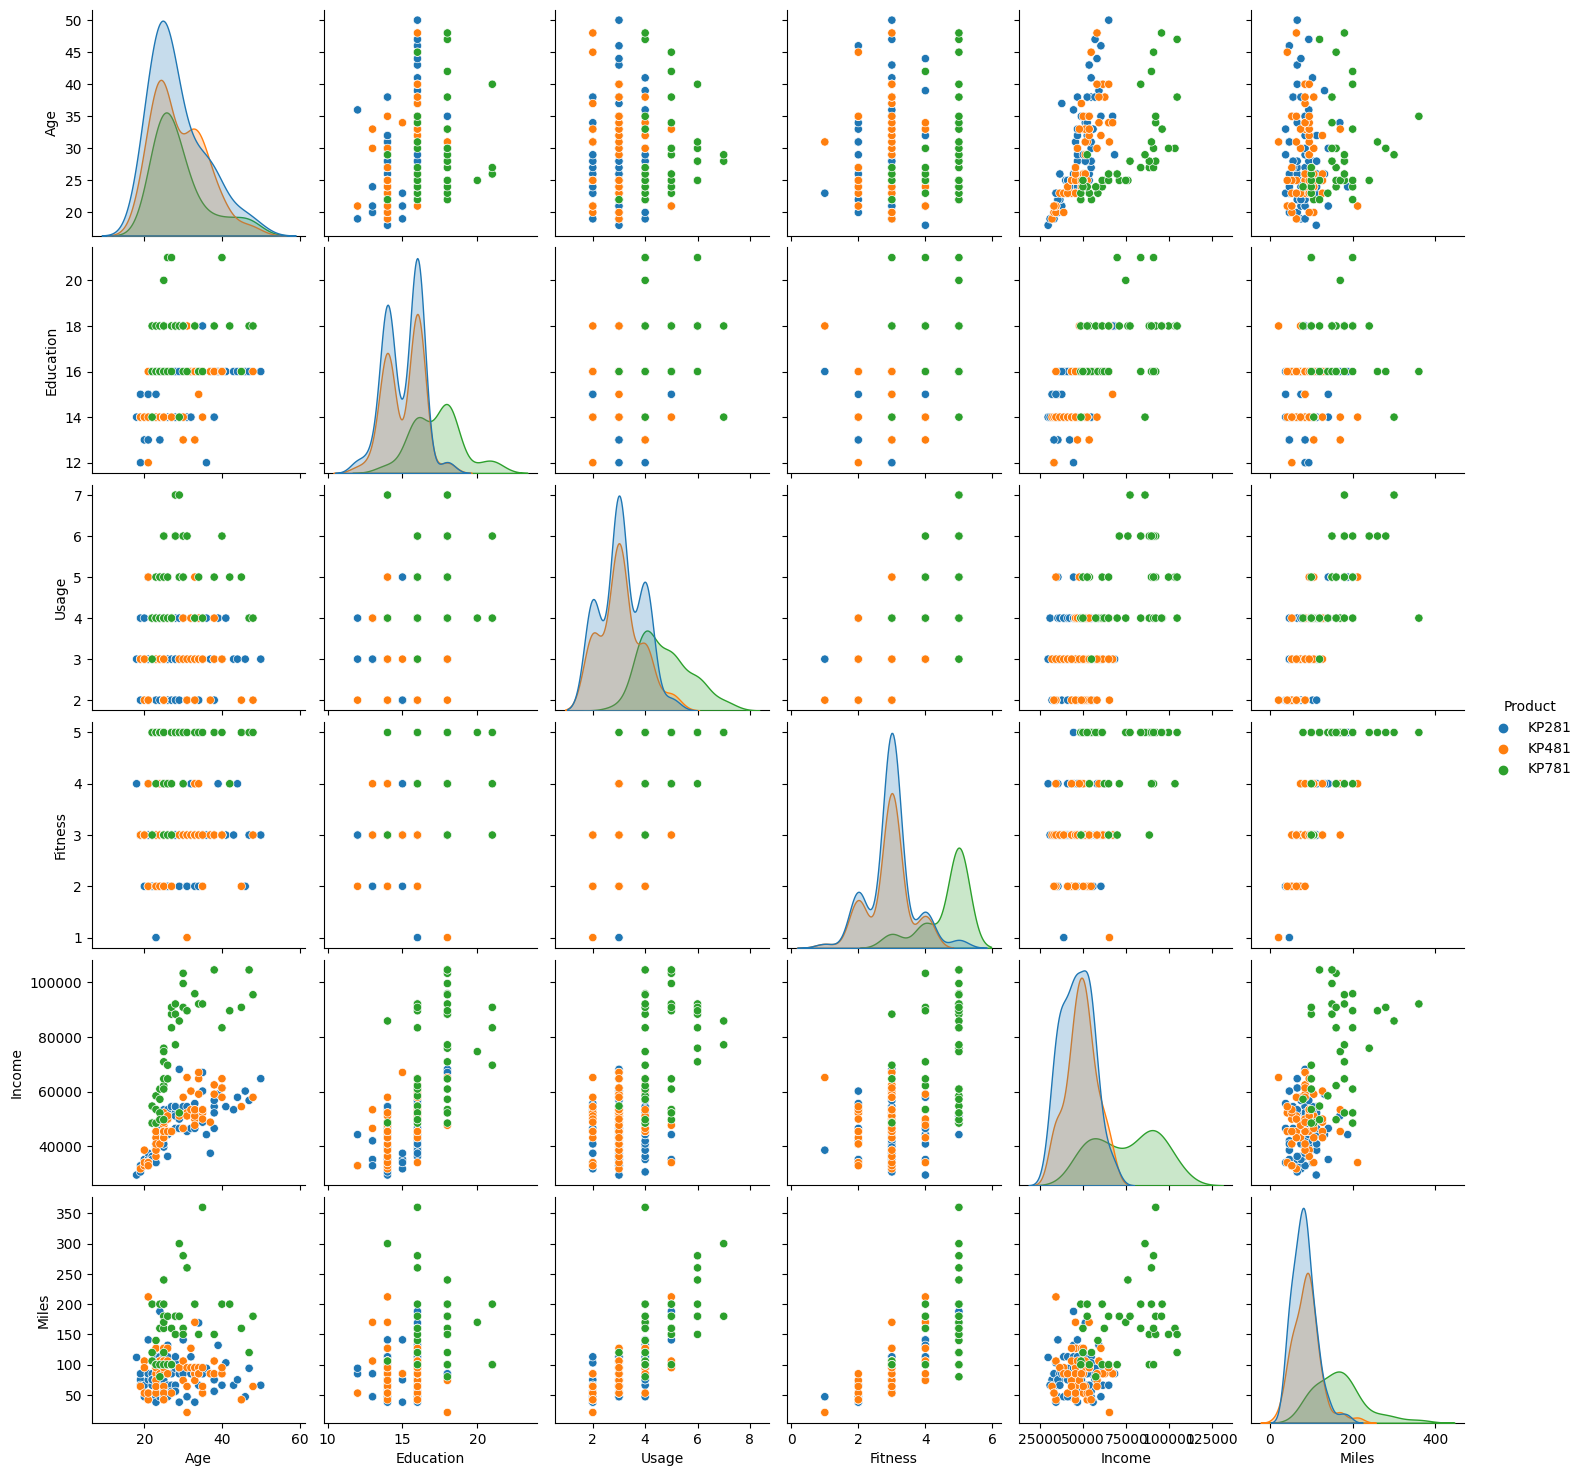

In [28]:
sns.pairplot(data=df,hue='Product')

<Axes: xlabel='Gender', ylabel='Income'>

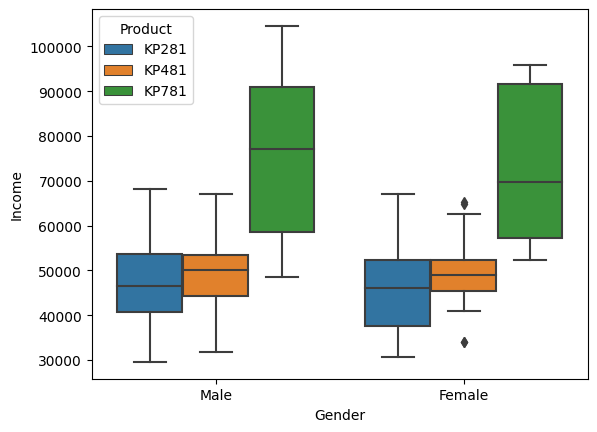

In [29]:
sns.boxplot(x="Gender", y="Income", hue="Product",data=df)

##### High income peoples are most likely buy KP781 

<Axes: xlabel='Gender', ylabel='Miles'>

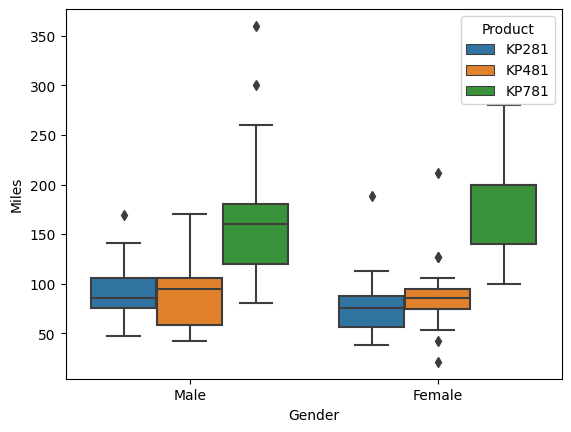

In [30]:
sns.boxplot(x="Gender", y="Miles", hue="Product",data=df)

##### People those have KP781 they run more than others

### Binning

In [31]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [32]:
df['Income'].max()

104581

In [33]:
df['Income'].min()

29562

In [34]:
df['bin_Income'] = pd.cut(df['Income'],[29000,40000,50000,60000,80000,105000]
                             ,labels=['Very Low', 'Low', 'Medium'
                                       ,'High', 'Very High'])

<Axes: xlabel='bin_Income', ylabel='Product'>

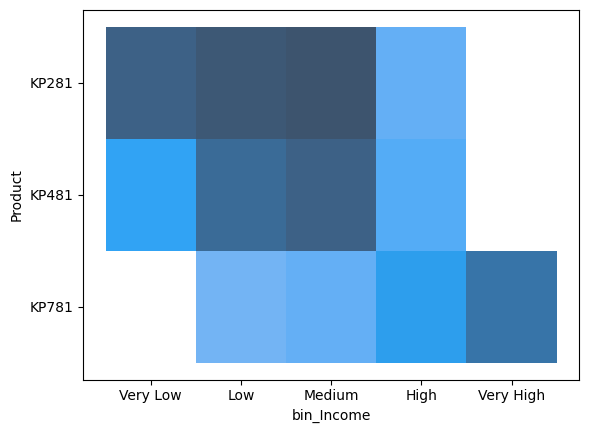

In [35]:
sns.histplot(data=df,x='bin_Income',y='Product')

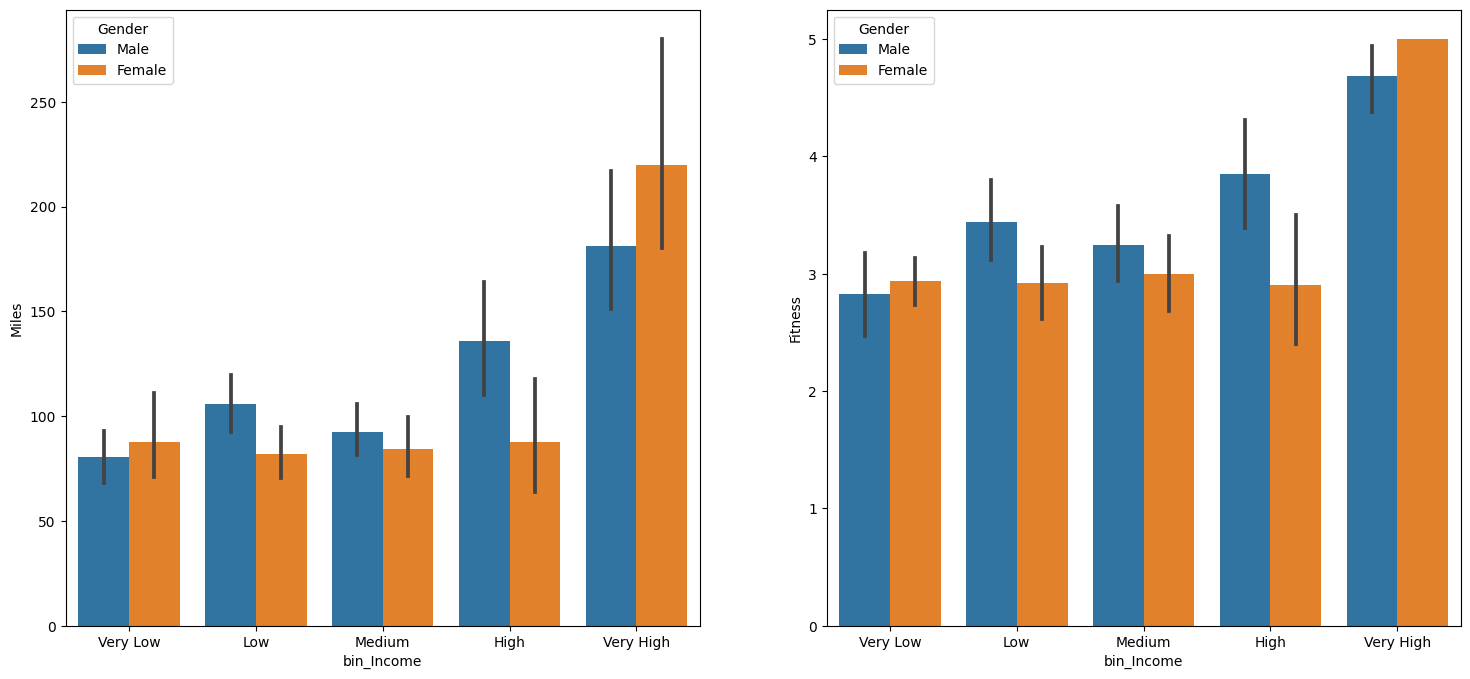

In [36]:
f, axes = plt.subplots(1, 2)
f.set_figwidth(18)
f.set_figheight(8)
sns.barplot(data=df,x='bin_Income',y='Miles',hue='Gender',ax=axes[0])
sns.barplot(data=df,x='bin_Income',y='Fitness',hue='Gender',ax=axes[1])
plt.show()

###### As Income increases Fitness is also increases

### Probability

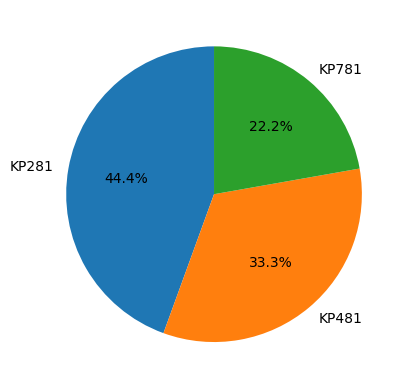

In [37]:
x=df.groupby('Product')['Gender'].count().reset_index()
plt.pie(x['Gender'], labels =x['Product'], autopct='%1.1f%%', startangle=90)
plt.show() 

###### P(KP281)=0.44
###### P(KP481)=0.33
###### P(KP781)=0.22

In [45]:
df['Gender'].value_counts()/df['Gender'].count()

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

###### P(Male)=0.577778
###### P(Female)=0.422222

In [49]:
df.groupby('Gender')['Product'].value_counts() / df.groupby('Gender')['Product'].count()

Gender  Product
Female  KP281      0.526316
        KP481      0.381579
        KP781      0.092105
Male    KP281      0.384615
        KP781      0.317308
        KP481      0.298077
Name: Product, dtype: float64

###### P(KP281/Male)=0.384615
###### P(KP281/Female)=0.526316

In [39]:
pd.crosstab(df['Product'],df['Gender'],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [40]:
df.groupby('MaritalStatus')['Product'].value_counts() / df.groupby('MaritalStatus')['Product'].count()

MaritalStatus  Product
Partnered      KP281      0.448598
               KP481      0.336449
               KP781      0.214953
Single         KP281      0.438356
               KP481      0.328767
               KP781      0.232877
Name: Product, dtype: float64

In [50]:
pd.crosstab(df['Product'],df['MaritalStatus'],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [41]:
df.groupby('bin_Income')['Product'].value_counts() / df.groupby('bin_Income')['Product'].count()

bin_Income  Product
Very Low    KP281      0.718750
            KP481      0.281250
Low         KP281      0.490196
            KP481      0.411765
            KP781      0.098039
Medium      KP281      0.472727
            KP481      0.418182
            KP781      0.109091
High        KP781      0.434783
            KP481      0.304348
            KP281      0.260870
Very High   KP781      1.000000
Name: Product, dtype: float64

In [51]:
pd.crosstab(df['Product'],df['bin_Income'],margins=True)

bin_Income,Very Low,Low,Medium,High,Very High,All
Product,,,,,,
KP281,23,25,26,6,0,80
KP481,9,21,23,7,0,60
KP781,0,5,6,10,19,40
All,32,51,55,23,19,180


Very low income(above 40k) dont buy KP781,Probability of buying KP281 is 71%
Probability of buying KP281 and KP481 by Low and Medium Salary People is 47% and 41%
Very high income(above 80k) dont buy KP281 and KP481,Probability of buying KP781 is 100%

In [59]:
df.groupby('bin_Income')['Fitness'].value_counts() / df.groupby('bin_Income')['Fitness'].count()

bin_Income  Fitness
Very Low    3          0.718750
            2          0.156250
            4          0.093750
            1          0.031250
Low         3          0.529412
            2          0.196078
            4          0.176471
            5          0.098039
Medium      3          0.600000
            2          0.181818
            4          0.109091
            5          0.109091
High        3          0.565217
            5          0.217391
            4          0.130435
            1          0.043478
            2          0.043478
Very High   5          0.789474
            4          0.157895
            3          0.052632
Name: Fitness, dtype: float64

P(Fitness>3/Income=VeryLow)=0.09
P(Fitness>3/Income=Low)=0.26
P(Fitness>3/Income=High)=0.3
P(Fitness>3/Income=VeryHigh)=0.93

###### Probability of VeryHigh Income people having high Fitness is 93%

### Insight

###### High income peoples are most likely buy KP781
###### People those have KP781 they run more than others
###### Very low income(above 40k) dont buy KP781,Probability of buying KP281 is 71%
###### Probability of buying KP281 and KP481 by Low and Medium Salary People is 47% and 41%
###### Very high income(above 80k) dont buy KP281 and KP481,Probability of buying KP781 is 100%
###### Probability of VeryHigh Income people having high Fitness is 93%